In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../Data/uber-nyc-forhire-vehicles-trip-data-2021/versions/1/dataframe_fhvhv_2021-05_with_cluster_labels.csv')

In [4]:
df.head()

,PULocationID,DOLocationID,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,pickup_datetime_dayofweek,dropoff_datetime_dayofweek,pickup_datetime_hour,trip_miles,trip_time,tolls,congestion_surcharge,airport_fee,driver_pay,dropoff_datetime_hour,cluster_labels
0,138,116,N,N,,N,N,3,3,20,7.25,1031,6.55,0.00,2.5,20.79,20,1
1,152,166,N,N,,N,N,1,1,8,1.18,439,0.00,0.00,0.0,7.92,8,1
2,229,244,N,N,,N,N,4,4,22,8.22,1123,0.00,2.75,0.0,19.46,22,0
3,132,25,N,N,,N,N,6,6,20,20.50,2172,0.00,0.00,2.5,62.32,21,0
4,188,77,N,N,,N,N,5,6,23,3.98,1222,0.00,0.00,0.0,17.45,0,0


In [5]:
clusters = pd.read_csv('../Data/uber-nyc-forhire-vehicles-trip-data-2021/versions/1/clusters_kprototypes_simplified.csv')

In [6]:
clusters

,trip_miles,trip_time,tolls,congestion_surcharge,airport_fee,driver_pay,PULocationID,DOLocationID,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,pickup_datetime_dayofweek,dropoff_datetime_dayofweek,pickup_datetime_hour,dropoff_datetime_hour
0,7.199341,1522.070669,1.511307,1.192699,0.208724,24.303305,138,265,N,N,,N,N,5,5,18,19
1,2.382398,651.662580,0.130981,0.895987,0.031470,11.570621,61,61,N,N,,N,N,5,5,19,22
2,16.082628,3019.131387,5.339299,1.188321,0.558394,49.134774,132,265,N,N,,N,N,4,4,15,18


In [7]:
df.groupby('cluster_labels').size()

cluster_labels
0    3198
1    6117
2     685
dtype: int64

### Comparativa entre clusters:

In [26]:
df_cluster_0 = df.loc[df['cluster_labels'] == 0]
df_cluster_1 = df.loc[df['cluster_labels'] == 1]
df_cluster_2 = df.loc[df['cluster_labels'] == 2]

In [29]:
top_10_pulocation = {
    'Cluster 0': df_cluster_0.loc[:, 'PULocationID'].value_counts(normalize=True).head(10),
    'Cluster 1': df_cluster_1.loc[:, 'PULocationID'].value_counts(normalize=True).head(10),
    'Cluster 2': df_cluster_2.loc[:, 'PULocationID'].value_counts(normalize=True).head(10)
}

top_10_pulocation_df = pd.DataFrame(top_10_pulocation)
top_10_pulocation_df


,Cluster 0,Cluster 1,Cluster 2
PULocationID,,,
7,NaN,0.010953,NaN
17,0.011257,NaN,NaN
37,0.011570,0.010953,NaN
39,NaN,0.011117,NaN
42,NaN,0.013242,NaN
61,0.016886,0.018310,NaN
76,NaN,0.015040,0.013139
79,NaN,0.011770,NaN
89,NaN,0.010299,0.016058


In [30]:
shared_request_flag = {
    'Cluster 0': df_cluster_0.loc[:,'shared_request_flag'].value_counts(normalize=True),
    'Cluster 1': df_cluster_1.loc[:,'shared_request_flag'].value_counts(normalize=True),
    'Cluster 2': df_cluster_2.loc[:,'shared_request_flag'].value_counts(normalize=True)
}

shared_request_flag_df = pd.DataFrame(shared_request_flag)
shared_request_flag_df

,Cluster 0,Cluster 1,Cluster 2
shared_request_flag,,,
N,0.999687,0.999346,0.99854
Y,0.000313,0.000654,0.00146


In [33]:
shared_match_flag = {
    'Cluster 0': df_cluster_0.loc[:,'shared_match_flag'].value_counts(normalize=True),
    'Cluster 1': df_cluster_1.loc[:,'shared_match_flag'].value_counts(normalize=True),
    'Cluster 2': df_cluster_2.loc[:,'shared_match_flag'].value_counts(normalize=True)
}

shared_match_flag_df = pd.DataFrame(shared_match_flag)
shared_match_flag_df

,Cluster 0,Cluster 1,Cluster 2
shared_match_flag,,,
N,1.0,0.99951,1.0
Y,NaN,0.00049,NaN


In [34]:
access_a_ride_flag = {
    'Cluster 0': df_cluster_0.loc[:,'access_a_ride_flag'].value_counts(normalize=True),
    'Cluster 1': df_cluster_1.loc[:,'access_a_ride_flag'].value_counts(normalize=True),
    'Cluster 2': df_cluster_2.loc[:,'access_a_ride_flag'].value_counts(normalize=True)
}

access_a_ride_flag_df = pd.DataFrame(access_a_ride_flag)
access_a_ride_flag_df

,Cluster 0,Cluster 1,Cluster 2
access_a_ride_flag,,,
,0.711069,0.747752,0.683212
N,0.288931,0.252248,0.316788


In [35]:
wav_request_flag = {
    'Cluster 0': df_cluster_0.loc[:,'wav_request_flag'].value_counts(normalize=True),
    'Cluster 1': df_cluster_1.loc[:,'wav_request_flag'].value_counts(normalize=True),
    'Cluster 2': df_cluster_2.loc[:,'wav_request_flag'].value_counts(normalize=True)
}

wav_request_flag_df = pd.DataFrame(wav_request_flag)
wav_request_flag_df

,Cluster 0,Cluster 1,Cluster 2
wav_request_flag,,,
N,0.997498,0.998365,0.99854
Y,0.002502,0.001635,0.00146


In [36]:
wav_match_flag = {
    'Cluster 0': df_cluster_0.loc[:,'wav_match_flag'].value_counts(normalize=True),
    'Cluster 1': df_cluster_1.loc[:,'wav_match_flag'].value_counts(normalize=True),
    'Cluster 2': df_cluster_2.loc[:,'wav_match_flag'].value_counts(normalize=True)
}

wav_match_flag_df = pd.DataFrame(wav_match_flag)
wav_match_flag_df

,Cluster 0,Cluster 1,Cluster 2
wav_match_flag,,,
N,0.953096,0.937224,0.969343
Y,0.046904,0.062776,0.030657


In [47]:
pickup_datetime_dayofweek = {
    'Cluster 0': df_cluster_0.loc[:,'pickup_datetime_dayofweek'].value_counts(normalize=True),
    'Cluster 1': df_cluster_1.loc[:,'pickup_datetime_dayofweek'].value_counts(normalize=True),
    'Cluster 2': df_cluster_2.loc[:,'pickup_datetime_dayofweek'].value_counts(normalize=True)
}
pickup_datetime_dayofweek_df = pd.DataFrame(pickup_datetime_dayofweek)
pickup_datetime_dayofweek_df.rename(index={0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}, inplace=True)

In [54]:
pickup_datetime_dayofweek_df

,Cluster 0,Cluster 1,Cluster 2
pickup_datetime_dayofweek,,,
Monday,0.130707,0.134707,0.129927
Tuesday,0.118512,0.118195,0.122628
Wednesday,0.124453,0.121792,0.156204
Thursday,0.129456,0.124407,0.160584
Friday,0.150094,0.146641,0.173723
Saturday,0.194809,0.188164,0.147445
Sunday,0.151970,0.166094,0.109489


<Figure size 1000x600 with 0 Axes>

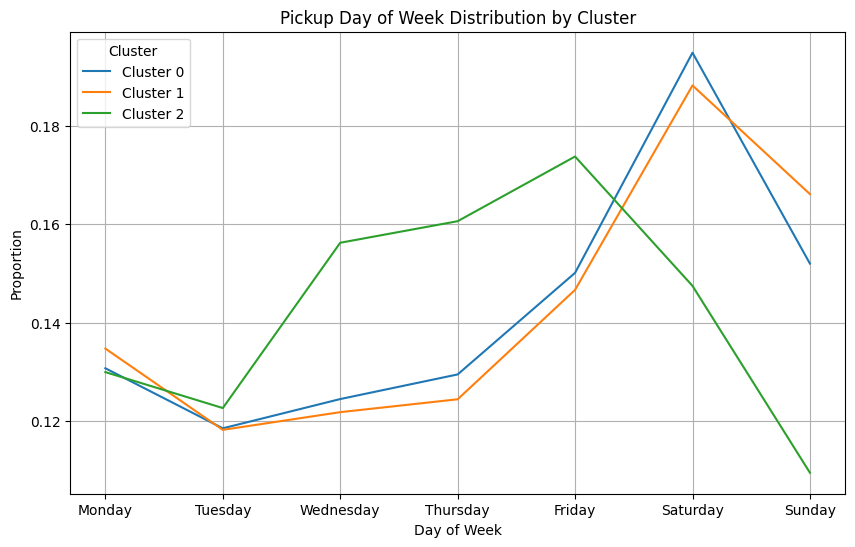

In [62]:
import matplotlib.pyplot as plt

pickup_datetime_dayofweek_df_reset = pickup_datetime_dayofweek_df.reset_index().rename(columns={'index': 'Day'})

# Plot the data
plt.figure(figsize=(10, 6))
for cluster in ['Cluster 0', 'Cluster 1', 'Cluster 2']:
    plt.plot(
        pickup_datetime_dayofweek_df_reset['pickup_datetime_dayofweek'],
        pickup_datetime_dayofweek_df_reset[cluster],
        label=cluster
    )

# Add labels, title, and legend
plt.title('Pickup Day of Week Distribution by Cluster')
plt.xlabel('Day of Week')
plt.ylabel('Proportion')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [40]:
pickup_datetime_hour = {
    'Cluster 0': df_cluster_0.loc[:,'pickup_datetime_hour'].value_counts(normalize=True),
    'Cluster 1': df_cluster_1.loc[:,'pickup_datetime_hour'].value_counts(normalize=True),
    'Cluster 2': df_cluster_2.loc[:,'pickup_datetime_hour'].value_counts(normalize=True)
}

pickup_datetime_hour_df = pd.DataFrame(pickup_datetime_hour)

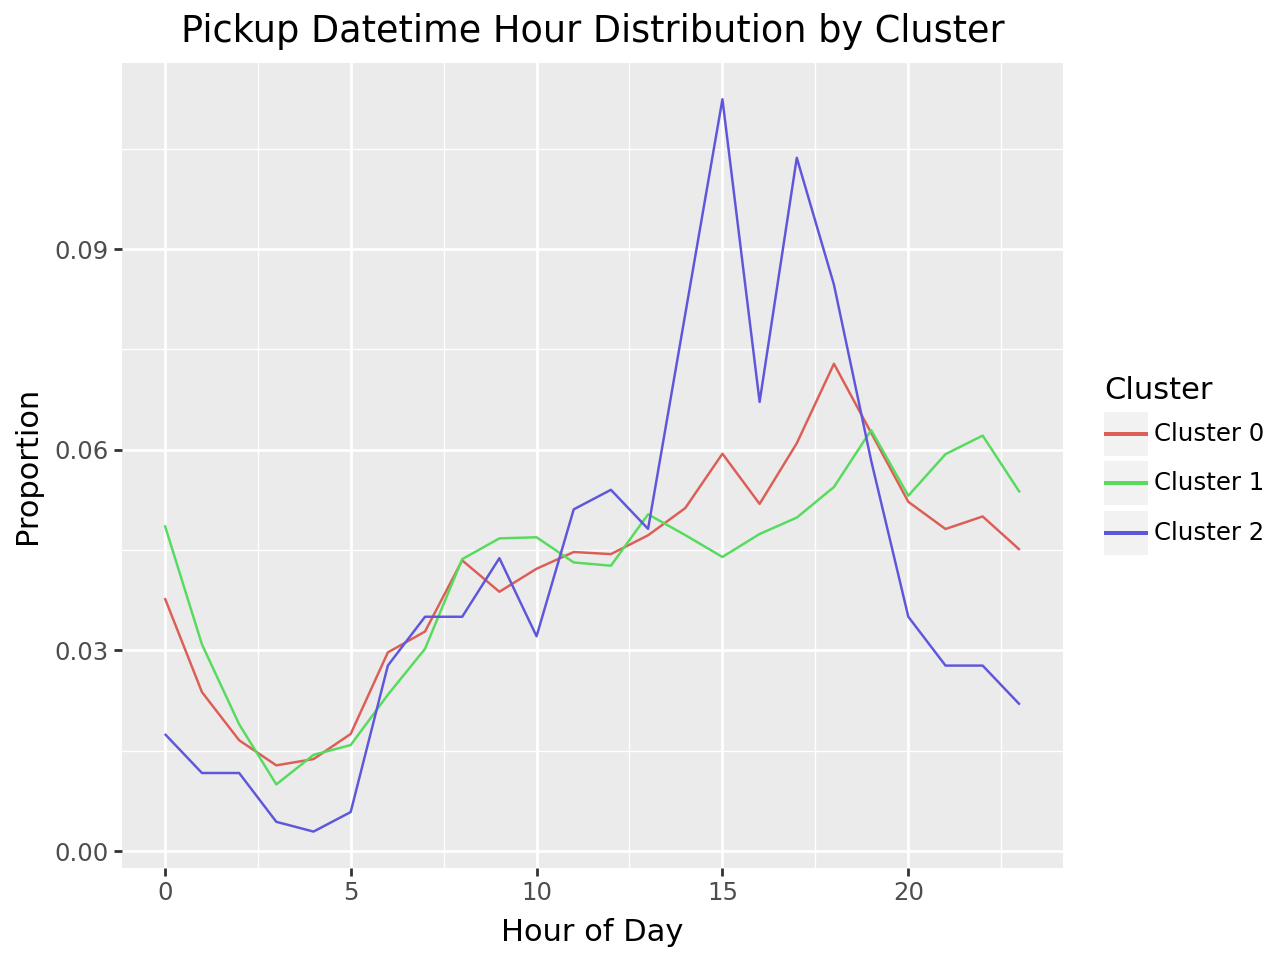

In [44]:
from plotnine import ggplot, aes, geom_line, labs

pickup_datetime_hour_df_reset = pickup_datetime_hour_df.reset_index().rename(columns={'index': 'Hour'})

plot = (
    ggplot(pickup_datetime_hour_df_reset, aes(x='pickup_datetime_hour')) +
    geom_line(aes(y='Cluster 0', color='"Cluster 0"')) +
    geom_line(aes(y='Cluster 1', color='"Cluster 1"')) +
    geom_line(aes(y='Cluster 2', color='"Cluster 2"')) +
    labs(
        title='Pickup Datetime Hour Distribution by Cluster',
        x='Hour of Day',
        y='Proportion',
        color='Cluster'
    )
)

plot

### Análisis cluster 0

In [10]:
clusters.iloc[0]

trip_miles                       7.199341
trip_time                     1522.070669
tolls                            1.511307
congestion_surcharge             1.192699
airport_fee                      0.208724
driver_pay                      24.303305
PULocationID                          138
DOLocationID                          265
shared_request_flag                     N
shared_match_flag                       N
access_a_ride_flag                       
wav_request_flag                        N
wav_match_flag                          N
pickup_datetime_dayofweek               5
dropoff_datetime_dayofweek              5
pickup_datetime_hour                   18
dropoff_datetime_hour                  19
Name: 0, dtype: object

In [27]:
df_cluster_0.loc[:,'PULocationID'].value_counts(normalize=True).head(10)

PULocationID
138    0.017198
61     0.016886
181    0.013446
255    0.013446
132    0.013446
225    0.012195
231    0.011570
37     0.011570
244    0.011257
17     0.011257
Name: proportion, dtype: float64

In [16]:
df_cluster_0.loc[:,'DOLocationID'].value_counts(normalize=True).head(10)

DOLocationID
265    0.044715
138    0.023765
132    0.022201
61     0.018449
37     0.015635
181    0.011882
75     0.011882
255    0.011570
244    0.011257
112    0.011257
Name: proportion, dtype: float64